In [1]:
from message_analysis import *
from bisect import insort

In [2]:
cl = load_json('/Users/balaram.usov/tokens_diffs/intellij_diff_blobs_identifiers.json')

In [3]:
scl = list(filter(lambda c: is_commit_small(c, 15), cl))
bcl = list(filter(lambda c: not is_commit_small(c, 15), cl))

In [4]:
len(scl), len(bcl)

(31530, 45144)

In [5]:
scl_freq = wordfreq_of_messages(scl)
bcl_freq = wordfreq_of_messages(bcl)

In [6]:
print_freq(scl_freq[:50])

no message 6.8%
extraction 7.62%
move 7.48%
code 6.7%
java 6.64%
rename 6.54%
com 6.18%
src 6.17%
intellij 6.17%
fixed 5.54%
impl 5.33%
actions 5.29%
refactoring 4.51%
tests 4.49%
insight 4.44%
moved 4.22%
new 4.14%
action 4.08%
model 3.47%
fix 3.45%
package 3.37%
inspection 2.8%
test 2.76%
debugger 2.74%
trunk 2.6%
cleanup 2.59%
abstract 2.57%
fixes 2.56%
http 2.56%
jetbrains 2.55%
demetra 2.55%
browse 2.52%
www 2.51%
net 2.51%
jira 2.49%
openapi 2.49%
inside 2.41%
changes 2.29%
layout 2.04%
annotating 1.93%
add 1.87%
module 1.86%
file 1.79%
dom 1.74%
removed 1.7%
modularization 1.69%
moving 1.69%
processor 1.68%
modules 1.64%
added 1.64%


In [7]:
print_freq(bcl_freq[:50])

no message 5.49%
updated 6.58%
copyright 6.22%
license 6.01%
fixed 5.91%
headers 5.91%
apache 5.91%
trunk 5.1%
demetra 4.88%
refactoring 4.31%
graph 4.25%
changes 3.64%
new 3.53%
inspection 3.5%
code 3.34%
file 3.06%
fix 3.05%
model 2.94%
framework 2.68%
support 2.61%
cleanup 2.59%
added 2.37%
method 2.18%
fixes 2.16%
work 2.11%
test 2.11%
methods 2.04%
progress 2.0%
initial 1.96%
add 1.94%
tests 1.93%
view 1.92%
one 1.86%
files 1.79%
abstract 1.77%
psi 1.74%
jetbrains 1.69%
error 1.69%
compliant 1.67%
tree 1.66%
jsp 1.65%
string 1.63%
http 1.61%
highlighting 1.6%
www 1.59%
net 1.59%
browse 1.57%
visitor 1.55%
jira 1.55%
action 1.53%


In [8]:
fs, fb = find_related_features(scl_freq, bcl_freq, coeff=5)

In [9]:
print_features(fs[:150])

7.62% extraction [156.39]
7.48% move [7.82]
6.54% rename [9.65]
6.18% com [18.98]
6.17% src [185.75]
6.17% intellij [27.29]
5.33% impl [12.59]
5.29% actions [7.78]
4.44% insight [64.71]
2.74% debugger [12.01]
2.41% inside [6.56]
1.93% annotating [9.57]
1.69% modularization [40.24]
1.68% processor [69.12]
1.64% modules [6.03]
1.48% idea [5.49]
1.32% inner [15.31]
1.26% anonymous [51.67]
1.09% watch [82.33]
1.02% nulled [12.46]
0.99% extractions [inf]
0.88% ee [9.22]
0.56% suppressing [6.46]
0.49% executions [inf]
0.4% nls [5.47]
0.35% reformatting [12.0]
0.31% redundant [6.38]
0.24% expose [18.14]
0.23% nullity [7.26]
0.22% newcode [6.26]
0.2% de [7.64]
0.2% interfaced [8.33]
0.19% wherever [10.92]
0.18% disposing [6.68]
0.16% reformatted [10.64]
0.15% fixups [22.43]
0.11% obfuscator [6.26]
0.1% squeeze [6.34]
0.1% performnace [6.34]
0.09% ranges [5.52]
0.08% instrumenting [37.23]
0.06% protected [14.32]
0.06% synonyms [6.44]
0.06% subtree [6.44]
0.05% runs [5.73]
0.05% combobox [5.73]


In [10]:
print_features(fb[:150])

6.58% updated [36.4]
6.22% copyright [245.06]
6.01% license [70.13]
5.91% headers [inf]
5.91% apache [inf]
2.68% framework [18.37]
1.67% compliant [inf]
1.55% visitor [7.09]
1.44% two [8.08]
1.42% base [6.56]
1.39% replaced [7.31]
1.32% result [10.14]
1.32% could [11.54]
1.28% simplified [21.28]
1.27% much [16.01]
1.27% every [17.4]
1.24% vararg [22.92]
1.23% affect [21.57]
1.23% grand [22.84]
0.62% schemas [10.29]
0.57% products [14.96]
0.37% svn [6.78]
0.34% factory [5.66]
0.33% pfd [5.48]
0.33% setters [102.67]
0.32% spec [8.44]
0.31% latest [9.85]
0.23% way [7.12]
0.23% surround [7.92]
0.22% goodies [5.7]
0.21% landed [inf]
0.19% seems [5.94]
0.18% modify [13.97]
0.16% comply [51.68]
0.16% arrays [12.75]
0.16% slow [inf]
0.16% dev [6.98]
0.14% lib [7.45]
0.14% uploaded [inf]
0.14% corrections [8.8]
0.14% rendering [11.0]
0.14% languages [7.1]
0.13% thumbnails [5.24]
0.12% skeleton [19.21]
0.12% charat [19.21]
0.11% notes [inf]
0.11% features [8.38]
0.1% quintsoft [inf]
0.1% row [5.

In [11]:
smallcat = categories_from_text(open('/Users/Balaram.Usov/small_message_categories.txt').read())
catkeys = list(smallcat.keys())

In [12]:
all_tokens = dict()
for c in scl:
    for w in c['allTokens']:
        if w not in all_tokens.keys(): all_tokens[w] = 0
        all_tokens[w] += 1
sorted_tokens = list(reversed(sorted(map(lambda wf: tuple(reversed(wf)), all_tokens.items()))))

In [13]:
def vec_of_data(commit, features):
    ctok = dict()
    for t in commit['allTokens']:
        if t in ctok.keys():
            ctok[t] += 1
        else:
            ctok[t] = 1
    fvec = list()
    for f in features:
        if f in ctok.keys():
            fvec.append(ctok[f])
        else:
            fvec.append(0)
    return fvec

In [14]:
def vec_of_categories(commit):
    l = list()
    tokens = set(filter(check_word, code_tokenize(commit['message'])))
    for k in catkeys:
        for cat in smallcat[k]:
            if cat in tokens:
                l.append(1)
                break
        else:
            l.append(0)
    return l

In [15]:
def split_with_and_no_message(commitlist):
    withmsg, nomsg = list(), list()
    for c in commitlist:
        if c['message'] == '(no message)':
            nomsg.append(c)
        else:
            withmsg.append(c)
    return withmsg, nomsg

In [16]:
scl_msg, scl_no = split_with_and_no_message(scl)

In [17]:
len(scl_msg), len(scl_no)

(29385, 2145)

In [18]:
import numpy as np
#x = np.array(list(map(vec_of_data, scl_msg)))
y = np.array(list(map(vec_of_categories, scl_msg)))

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import recall_score, precision_score
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import VarianceThreshold

In [20]:
corpus = list(map(lambda c: ' '.join(c['allTokens']), scl_msg))

In [21]:
len(corpus)

29385

In [22]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)

In [23]:
sel = VarianceThreshold(threshold=0.0001)
X_best = sel.fit_transform(X)
sel_features_bool = sel.get_support()

In [24]:
best_features = list(map(lambda bd: bd[1], filter(lambda bd: bd[0], zip(sel_features_bool, vectorizer.get_feature_names()))))

In [25]:
len(best_features)

818

In [26]:
x_train, x_test, y_train, y_test = train_test_split(X_best, y, test_size=0.2, random_state=42)

In [27]:
x_train.shape, y_train.shape

((23508, 818), (23508, 31))

In [28]:
clf_nb = list()
for i in range(len(catkeys)):
    clf = MultinomialNB()
    #clf = SVC(gamma='auto')
    clf.fit(x_train, y_train[:,i])
    clf_nb.append(clf)

In [29]:
for i in range(len(catkeys)):
    print(i, catkeys[i], len(list(filter(lambda n: n != 0, y_train[:,i])))/len(y_train[:,i])*100)

0 minor 1.152799047132891
1 fix 12.229879190062958
2 refactor 0.11485451761102604
3 new 6.419091373149566
4 extend 0.10209290454313426
5 extraction 9.409562702058874
6 move 9.503147864556746
7 rename 7.818614939595031
8 intellij 8.065339458907605
9 actions 5.525778458397141
10 insight 4.836651352730986
11 inner 3.9390845669559296
12 bug 0.7954738812319211
13 debugger 2.9394248766377404
14 package 4.202824570359027
15 meta 4.1432703760421985
16 module 5.610855878849754
17 null 2.6203845499404457
18 generify 0.47643355453462655
19 reformatting 0.6083035562361749
20 performance 1.0592138846350179
21 anonymous 1.2804151778118087
22 optimization 0.7742045261187681
23 typo 0.08933129147524246
24 clean 2.9053939084566953
25 model 3.6200442402586352
26 support 1.3910158244002042
27 latest 0.025523226135783564
28 squeeze 0.11910838863365664
29 speed 0.11485451761102604
30 test 6.925302024842607


In [ ]:
#cat = catkeys[7]
#raw_train_y = y_train[:,7]

#rename_clf = SVC(gamma='auto')
# wtf is this

In [33]:
for i in range(len(catkeys)):
    clf = clf_nb[i]
    y_predict = clf.predict(x_test)
    ap = recall_score(y_test[:,i], y_predict)
    pp = precision_score(y_test[:,i], y_predict)
    print(catkeys[i] + ' '*(max(map(len, catkeys))-len(catkeys[i])), '\t', round(100*ap, 1), '\t', round(100*pp, 1))

minor        	 0.0 	 0.0
fix          	 5.8 	 67.2
refactor     	 0.0 	 0.0
new          	 8.9 	 89.2
extend       	 0.0 	 0.0
extraction   	 0.0 	 0.0
move         	 10.6 	 78.3
rename       	 6.7 	 91.9
intellij     	 0.2 	 20.0
actions      	 0.8 	 75.0
insight      	 0.0 	 0.0
inner        	 0.0 	 0.0
bug          	 0.0 	 0.0
debugger     	 0.0 	 0.0
package      	 75.2 	 61.9
meta         	 41.5 	 52.3
module       	 12.0 	 34.2
null         	 1.2 	 100.0
generify     	 0.0 	 0.0
reformatting 	 0.0 	 0.0
performance  	 0.0 	 0.0
anonymous    	 0.0 	 0.0
optimization 	 0.0 	 0.0
typo         	 0.0 	 0.0
clean        	 0.0 	 0.0
model        	 28.1 	 86.1
support      	 1.2 	 100.0
latest       	 0.0 	 0.0
squeeze      	 0.0 	 0.0
speed        	 0.0 	 0.0
test         	 6.4 	 62.5


In [31]:
good_cat_clf = list()
for i in range(len(catkeys)):
    clf = clf_nb[i]
    y_predict = clf.predict(x_test)
    prec = precision_score(y_test[:,i], y_predict)
    if prec >= 0.55:
        good_cat_clf.append([i, catkeys[i], clf])

In [34]:
good_cat_clf

[[1, 'fix', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)],
 [3, 'new', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)],
 [6, 'move', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)],
 [7, 'rename', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)],
 [9, 'actions', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)],
 [14, 'package', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)],
 [17, 'null', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)],
 [25, 'model', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)],
 [26, 'support', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)],
 [30, 'test', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)]]

In [81]:
def calc_score(score_func, y_pred_proba, y_test, tsh, check_no_samples=False):
    scores = list()
    for t in tsh:
        y_pred = y_pred_proba >= t
        if check_no_samples and not np.any(y_pred):
            s = 1.0
        else:
            s = score_func(y_test, y_pred)
        scores.append(s)
    return np.array(scores)

def rpcurve(clf, x_test, y_test, start=0, stop=1, step=.05):
    tsh = np.arange(start, stop+step, step)
    y_pred_proba = clf.predict_proba(x_test)[:,1]
    recl = calc_score(recall_score, y_pred_proba, y_test, tsh)
    prec = calc_score(precision_score, y_pred_proba, y_test, tsh, check_no_samples=True)
    return tsh, recl, prec

In [96]:
curves = list()
for i, catname, clf in good_cat_clf:
     curves.append(rpcurve(clf, x_test, y_test[:,i]))

In [97]:
import matplotlib.pyplot as plt

In [98]:
def draw_curve(i):
    _, catname, _   = good_cat_clf[i]
    tsh, recl, prec = curves[i]
    plt.plot(tsh, recl)
    plt.plot(tsh, prec)
    plt.title(catname)
    plt.xlabel('threshold')
    plt.show()

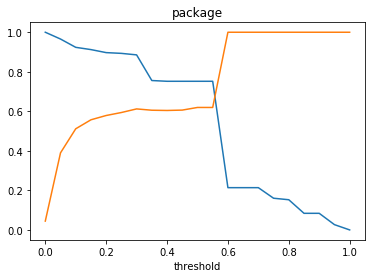

In [101]:
draw_curve(5)

In [ ]:
def predict_categories(commit):
    catnames = list()
    commit_vec = np.array(vec_of_data(commit, best_features)).reshape(1, -1)
    for i, catname, clf in good_cat_clf:
        pr = clf.predict(commit_vec)
        if pr == 1: catnames.append(catname)
    return catnames

In [ ]:
for c in scl_no:
    c_cats = predict_categories(c)
    if c_cats:
        print(c, '\n', c_cats)

In [ ]:
aurora_cl_1 = load_json('/Users/Balaram.Usov/tokens_diffs/aurora_diff_blobs_identifiers_all_aurora_1.json')
aurora_cl_2 = load_json('/Users/Balaram.Usov/tokens_diffs/aurora_diff_blobs_identifiers_all_aurora_2.json')

In [ ]:
acl = aurora_cl_1 + aurora_cl_2

In [ ]:
def _split_with_and_no_message(commitlist):
    withmsg, nomsg = list(), list()
    for c in commitlist:
        if 'no message' in c['message']:
            nomsg.append(c)
        else:
            withmsg.append(c)
    return withmsg, nomsg

In [ ]:
acl_msg, acl_no = _split_with_and_no_message(acl)

In [ ]:
len(acl_msg), len(acl_no)

In [ ]:
for c in acl:
    cats = predict_categories(c)
    c['categories'] = cats

In [ ]:
with open('/Users/Balaram.Usov/aurora_small_changes.json', 'w') as f:
    f.write(json.dumps(acl, indent=4))